# Исследование надежности заемщиков


**Цель работы: исследовать влияет ли семейное положение, количество детей клиента и другие критерии на факт погашения кредита в срок.**

Входные данные от банка — статистика о платёжеспособности клиентов. 

Описание данных  
children — количество детей в семье  
days_employed — общий трудовой стаж в днях  
dob_years — возраст клиента в годах  
education — уровень образования клиента  
education_id — идентификатор уровня образования  
family_status — семейное положение  
family_status_id — идентификатор семейного положения  
gender — пол клиента  
income_type — тип занятости  
debt — имел ли задолженность по возврату кредитов  
total_income — ежемесячный доход  
purpose — цель получения кредита  

Работу можно разделить на два раздела: первый - это подготовка входных данных, второй раздел - получение необходимых метрик и выводы. 

Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

**Найдём процент не вернувших кредит в срок от получивших кредит для каждого количества детей**

In [23]:
def data_metric(column): #Создание функции для формирования сводной таблицы 
    metric = data.pivot_table(index=column, values='debt', aggfunc=['count', sum, 'mean'])
    metric['mean'] = metric['mean']*100 #Перевод доли должников в проценты
    metric = metric.rename(columns={'count':'Количество заемщиков', #Изменение названия столбцов
                                    'sum':'Количество должников', 
                                    'mean':'Средний процент просрочки по категории', 'debt':''})
    
    return metric
data_metric('children')

,Количество заемщиков,Количество должников,Средний процент просрочки по категории
,,,
children,,,
0,14091,1063,7.543822
1,4808,444,9.234609
2,2052,194,9.454191
3,330,27,8.181818
4,41,4,9.756098
5,9,0,0.000000


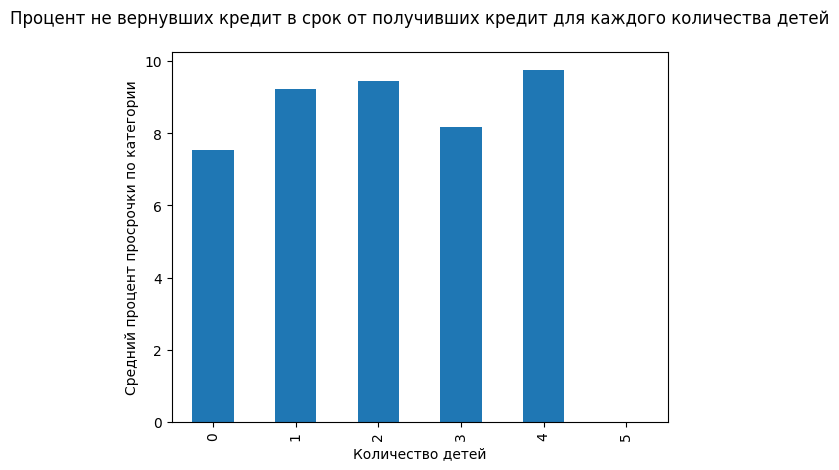

In [24]:
(data_metric('children')['Средний процент просрочки по категории']).plot.bar()
plt.xlabel('Количество детей')
plt.ylabel('Средний процент просрочки по категории')
plt.title('Процент не вернувших кредит в срок от получивших кредит для каждого количества детей\n');

**Вывод:**    
* наибольший процент просрочек 9.45% у людей с 2-мя детьми;
* чуть меньше, 9.23%, у заёмщиков с 1-м ребёнком;
* наименьший процент просрочек 7.54% у людей без детей.

У семей с 3, 4, 5-ю детьим  средний процент просрочки не информативен, так как количество таких семей в данной выборке ничтожно мало. В целом можно увидеть, что чем больше у заемщика детей, тем он хуже платит в срок.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [25]:
data_metric('family_status')

,Количество заемщиков,Количество должников,Средний процент просрочки по категории
,,,
family_status,,,
Не женат / не замужем,2796,273,9.763948
в разводе,1189,84,7.064760
вдовец / вдова,951,63,6.624606
гражданский брак,4134,385,9.313014
женат / замужем,12261,927,7.560558


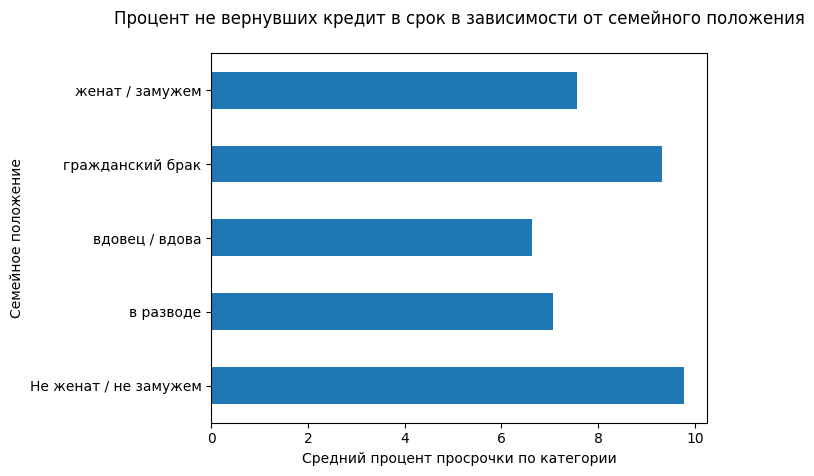

In [26]:
(data_metric('family_status')['Средний процент просрочки по категории']).plot.barh()
plt.ylabel('Cемейное положение')
plt.xlabel('Средний процент просрочки по категории')
plt.title('Процент не вернувших кредит в срок в зависимости от семейного положения\n');

**Вывод:** 
* наибольший процент просрочек 9.76% у не женатых/не замужних кредитополучателей;
* чуть меньше, 9.31%, у заёмщиков состоящих в гражданском браке;
* наименший процент просрочек 6.62% у вдовцов/вдов.  
Следует отметить, что доля должников у людей не состоявших в оф. браке выше.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [27]:
data_metric('total_income_category')

,Количество заемщиков,Количество должников,Средний процент просрочки по категории
,,,
total_income_category,,,
A,25,2,8.000000
B,5014,354,7.060231
C,15921,1353,8.498210
D,349,21,6.017192
E,22,2,9.090909


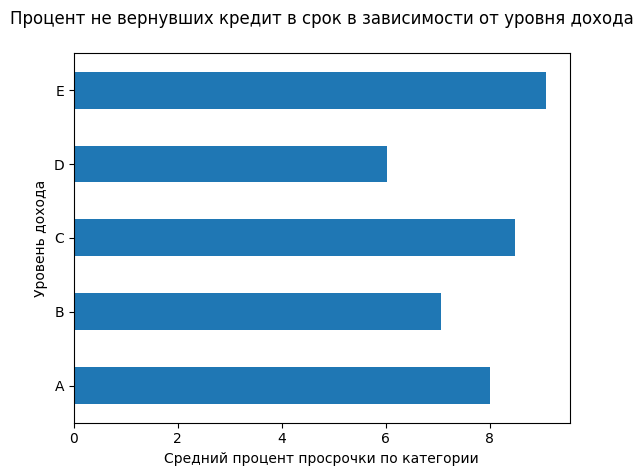

In [28]:
(data_metric('total_income_category')['Средний процент просрочки по категории']).plot.barh()
plt.ylabel('Уровень дохода')
plt.xlabel('Средний процент просрочки по категории')
plt.title('Процент не вернувших кредит в срок в зависимости от уровня дохода\n');

**Вывод:** 
* наибольший процент просрочек 8.48% у людей из категории дохода 'C', с уровнем дохода 50001–200000;
* наименший процент просрочек 7.06% у людей из категории дохода 'B', с уровнем дохода 200001–1000000 руб.

Количество заемщиков во всех категориях кроме B и C несопоставимо меньше, поэтому для выявления зависимости не учитывались. 


#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [29]:
data_metric('purpose_category')

,Количество заемщиков,Количество должников,Средний процент просрочки по категории
,,,
purpose_category,,,
операции с автомобилем,4279,400,9.347978
операции с недвижимостью,10751,780,7.255139
получение образования,3988,369,9.252758
проведение свадьбы,2313,183,7.911803


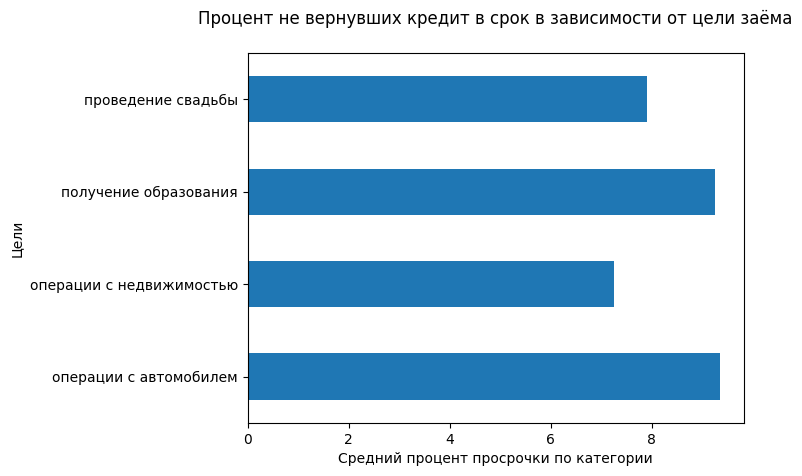

In [30]:
(data_metric('purpose_category')['Средний процент просрочки по категории']).plot.barh()
plt.ylabel('Цели')
plt.xlabel('Средний процент просрочки по категории')
plt.title('Процент не вернувших кредит в срок в зависимости от цели заёма\n');

**Вывод:** 
* наибольший процент просрочек 9.34% у людей взявших кредит для орепаций с автомобилем;
* наименший процент просрочек 7.25% у людей взявших кредит для орепаций с недвижимостью.


**Найдём процент не вернувших кредит в срок от числа кредитополучателей в зависимости от образования**

In [31]:
data_metric('education')

,Количество заемщиков,Количество должников,Средний процент просрочки по категории
,,,
education,,,
высшее,5227,278,5.318538
начальное,282,31,10.992908
неоконченное высшее,741,68,9.176788
среднее,15075,1355,8.988391
ученая степень,6,0,0.000000


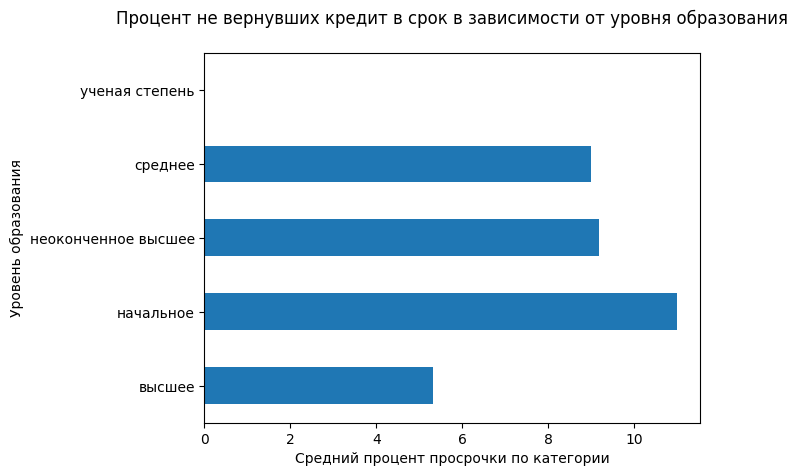

In [32]:
data_metric('education')['Средний процент просрочки по категории'].plot.barh()
plt.ylabel('Уровень образования')
plt.xlabel('Средний процент просрочки по категории')
plt.title('Процент не вернувших кредит в срок в зависимости от уровня образования\n');

**Вывод:** 
* наибольший процент просрочек 8.98% у людей со средним образованием;
* наименший процент просрочек 5.31% у людей с высшим образованием.

Люди с начальным, неоконченным высшим образованием и с ученой степенью представленны в выборке незначительным количеством и при выявлении зависимости не учитывались.

**Найдём процент не вернувших кредит в срок от числа кредитополучателей в зависимости от пола заёмщика**

In [33]:
data = data[(data['gender'] != 'XNA')] #Удаление аномального значения в столбце 'gender'
data_metric('gender')

,Количество заемщиков,Количество должников,Средний процент просрочки по категории
,,,
gender,,,
F,14092,989,7.018166
M,7238,743,10.265267


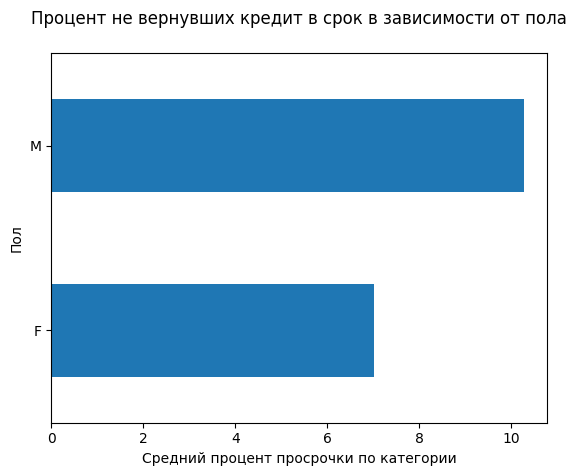

In [34]:
data_metric('gender')['Средний процент просрочки по категории'].plot.barh()
plt.ylabel('Пол')
plt.xlabel('Средний процент просрочки по категории')
plt.title('Процент не вернувших кредит в срок в зависимости от пола\n');

**Вывод:** 
* среди мужчин процент просрочек 10.26% выше, чем среди женщин 7.01%.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Причины появления пропусков в исходных данных делятся на две большие группы: технологические, и причины обусловленные человеческим фактором.
Технологические причины порождают пропуски при копировании, считывании, смене формата. Сбой может произойти даже во время записи данных.  Пропуски вызванные человеческим фактором связаны с ошибками или нежеланием человека предоставлять информацию.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Среднее значение некорректно характеризует данные, когда некоторые показатели сильно выделяются среди большинства. В связи с этим, медианое значение - более объективная информация, чем среднее значение.

### Шаг 4: общий вывод.

Входные данные от банка — статистика о платёжеспособности клиентов. В исходной таблице 21525 строк — это достаточная выборка для проведения исследования.   
В столбце `total_income` — ежемесячный доход, обнаружено 2174 пропущенных значений. Пропуски в этом столбце заполнены  медианным значением по каждому типу из столбца `income_type` - тип занятости. Отрицательное количество дней трудового стажа в столбце `days_employed` заменины положительными значениями. Вещественный тип данных в столбце `total_income` заменён на целочисленный. Неявные дубликаты в столбце `education` и аномальные значения а столбце `children` выявлены и удалены. Данные в столбцах `total_income_category` и `purpose` оформлены в соответствующие категории.

В ходе работы ваявлены следующие зависимости: 
* С увеличением количества детей растёт процент просрочки кредита: наибольший процент просрочек - 9.45%, у людей с 2-мя детьми, чуть меньше - 9.23%, у заёмщиков с 1-м ребёнком и наименьший процент просрочек - 7.54%, у людей без детей.
* При анализе влияния семейного положения установлено, наибольший процент просрочек - 9.76%, у не женатых/не замужних кредитополучателей. Чуть меньше - 9.31%, у заёмщиков состоящих в гражданском браке и наименший процент просрочек, 6.62%, у вдовцов/вдов.
* В зависимости от уровня дохода, наибольший процент просрочек - 8.48%, у людей из категории дохода 'C', с уровнем дохода 50001–200000, наименший процент просрочек - 7.06%, у людей из категории дохода 'B', с доходом 200001–1000000 руб.
* Наибольший процент просрочек - 9.34%, у людей взявших кредит для орепаций с автомобилем; наименший процент просрочек - 7.25% у людей взявших кредит для орепаций с недвижимостью.
* На факт возврата кредита так же влияет уровень образования, так наибольший процент просрочек - 8.98%, у людей со средним образованием, наименший процент просрочек - 5.31%, у людей с высшим образованием.
* Среди мужчин процент просрочек - 10.26%, выше, чем среди женщин - 7.01%.

Что могло повлиять на результаты исследования:

непропорциональное гендерное соотношение в выборке: 14092 женщин против 7238 мужчин
малое количество данных по клиентам с уровнями дохода A, D и E, по ним требуется отдельное исследование
наличие пропусков в признаках days_employed и total_income - стоит уточнить природу происхождения этих пропусков

В качестве рекомендаций:

можно предложить другую категоризацию по доходам
исследовать другие признаки, рассчитать другие метрики (отношение дохода к сумме выплат и др.)
в анкете сделать поля о доходе и стаже обязательными к заполнению
добавить автопроверку на формат вводимых пользователем данных

 